# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Build request URL parts
urlBase = "https://api.openweathermap.org/data/2.5/weather?q="
urlappid = "&appid="
urlUnits = "&units=imperial"

In [ ]:
# Initialize lists and variables for dataframe construction and list iterators

latList = []
lonList = []
maxTempList = []
humList = []
cloudcovList = []
windList = []
countryList = []
datetimeList = []
cityIndex = 0
setCounter = 1
setIterator = 1
cityExceptList = []
cityExceptIndList = []

# Request loop
for city in cities:
    # Create try/except to compensate for errors
    try:
        print(f'Searching for city {setIterator}, "{city}" of set {setCounter}')
        fullRequestUrl = f'{urlBase}{city}{urlappid}{weather_api_key}{urlUnits}'
        jsonObj = requests.get(fullRequestUrl).json()
        #Pull data from json response into lists
        latList.append(jsonObj["coord"]["lat"])
        lonList.append(jsonObj["coord"]["lon"])
        maxTempList.append(jsonObj["main"]["temp_max"])
        humList.append(jsonObj["main"]["humidity"])
        cloudcovList.append(jsonObj["clouds"]["all"])
        windList.append(jsonObj["wind"]["speed"])
        countryList.append(jsonObj["sys"]["country"])
        datetimeList.append(jsonObj["timezone"])
    except:
        print(f'        ...city not found. Recording and resuming.')
        cityExceptList.append(city)
        cityExceptIndList.append(cityIndex)
# Iterator adjustments for city/set number
    cityIndex += 1
    setIterator += 1
    if setIterator == 50:
        setCounter +=1
        setIterator = 1
# Create lag for API call frequency
    time.sleep(1)
print(f'Requests complete!')

Searching for city 1, "taolanaro" of set 1
        ...city not found. Recording and resuming.
Searching for city 2, "vaini" of set 1
Searching for city 3, "ojinaga" of set 1
Searching for city 4, "ushuaia" of set 1
Searching for city 5, "broken hill" of set 1
Searching for city 6, "grand gaube" of set 1
Searching for city 7, "ilulissat" of set 1
Searching for city 8, "hermanus" of set 1
Searching for city 9, "caravelas" of set 1
Searching for city 10, "ugoofaaru" of set 1
Searching for city 11, "yellowknife" of set 1
Searching for city 12, "mar del plata" of set 1
Searching for city 13, "rikitea" of set 1
Searching for city 14, "vardo" of set 1
Searching for city 15, "kazalinsk" of set 1
        ...city not found. Recording and resuming.
Searching for city 16, "pampa" of set 1
Searching for city 17, "mmabatho" of set 1
Searching for city 18, "port alfred" of set 1
Searching for city 19, "hilo" of set 1
Searching for city 20, "guaruja" of set 1
Searching for city 21, "punta arenas" of s

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
# Title capitalize all cities for formatting
cleanCityList = []
for cityerror in cityExceptList:
    cities.remove(cityerror)
cityTitleList = []
for city in cities:
    cityTitleList.append(city.title())

In [20]:
# Create initial dataframe
citiesdict = {
    "City Name":cityTitleList,
    "City Latitude":latList,
    "City Longitude":lonList,
    "Max Temperature":maxTempList,
    "Humidity":humList,
    "Cloud Coverage":cloudcovList,
    "Wind Speed":windList,
    "City Country":countryList,
    "City Datetime":datetimeList
}
citiesdf = pd.DataFrame(citiesdict)
citiesdf

,City Name,City Latitude,City Longitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Country,City Datetime
0,Thompson,55.74,-97.86,8.60,84,90,13.87,CA,-21600
1,Mackay,-21.15,149.20,78.80,88,75,9.17,AU,36000
2,Saint George,37.10,-113.58,39.99,80,90,1.90,US,-25200
3,Rafai,4.95,23.92,69.89,53,100,1.88,CF,3600
4,Cape Town,-33.93,18.42,62.01,82,75,5.82,ZA,7200
...,...,...,...,...,...,...,...,...,...
565,Saint-Francois,46.42,3.91,42.80,70,90,10.29,FR,3600
566,Zhigansk,66.77,123.37,-10.34,88,100,19.89,RU,32400
567,Nambour,-26.63,152.95,82.99,79,100,1.99,AU,36000
568,Nizhneivkino,58.19,49.52,-10.37,90,5,2.04,RU,10800


In [21]:
# Output dataframe to csv
citiesdf.to_csv("citiesdfOutput.csv", index=True, header=True)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# Read city dataframe recorded 12/28/2020 to dataframe 
#(for continuation of study without needing to re-request to the source)
citiescsvdf = pd.read_csv("citiesdfOutput.csv", encoding = "UTF-8", index_col = 0)
citiescsvdf

,City Name,City Latitude,City Longitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Country,City Datetime
0,Thompson,55.74,-97.86,8.60,84,90,13.87,CA,-21600
1,Mackay,-21.15,149.20,78.80,88,75,9.17,AU,36000
2,Saint George,37.10,-113.58,39.99,80,90,1.90,US,-25200
3,Rafai,4.95,23.92,69.89,53,100,1.88,CF,3600
4,Cape Town,-33.93,18.42,62.01,82,75,5.82,ZA,7200
...,...,...,...,...,...,...,...,...,...
565,Saint-Francois,46.42,3.91,42.80,70,90,10.29,FR,3600
566,Zhigansk,66.77,123.37,-10.34,88,100,19.89,RU,32400
567,Nambour,-26.63,152.95,82.99,79,100,1.99,AU,36000
568,Nizhneivkino,58.19,49.52,-10.37,90,5,2.04,RU,10800


In [6]:
# Check for and remove cities with humidity over 100%
# Get the indices of cities that have humidity over 100%.
humidList = []

for index, row in citiescsvdf.iterrows():
    if row["Humidity"] > 100:
        humidList.append(index)
print(f'Do any cities need to be removed due to humidity?: ', end = "", flush = True)
if len(humidList) == 0:
    print(f'No')
elif len(humidList) > 0:
    print(f'Yes')


Do any cities need to be removed due to humidity?: No


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = citiescsvdf.drop(labels = humidList, inplace = False)
clean_city_data

,City Name,City Latitude,City Longitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Country,City Datetime
0,Thompson,55.74,-97.86,8.60,84,90,13.87,CA,-21600
1,Mackay,-21.15,149.20,78.80,88,75,9.17,AU,36000
2,Saint George,37.10,-113.58,39.99,80,90,1.90,US,-25200
3,Rafai,4.95,23.92,69.89,53,100,1.88,CF,3600
4,Cape Town,-33.93,18.42,62.01,82,75,5.82,ZA,7200
...,...,...,...,...,...,...,...,...,...
565,Saint-Francois,46.42,3.91,42.80,70,90,10.29,FR,3600
566,Zhigansk,66.77,123.37,-10.34,88,100,19.89,RU,32400
567,Nambour,-26.63,152.95,82.99,79,100,1.99,AU,36000
568,Nizhneivkino,58.19,49.52,-10.37,90,5,2.04,RU,10800


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

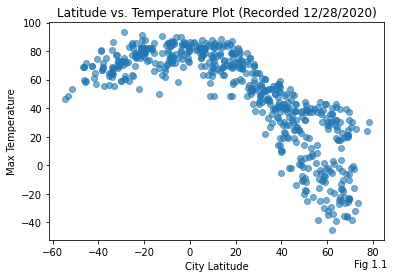

Comparison of a city's max temperature against its
latitudinal location on the globe. A clear curving pattern
is present suggesting a correlation.


In [8]:
# Gather data
x_values = clean_city_data["City Latitude"]
y_values = clean_city_data["Max Temperature"]

# Draw plot and labels
plt.scatter(x_values, y_values, alpha=0.60)
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude vs. Temperature Plot (Recorded 12/28/2020)")
plt.figtext(.83,.03,"Fig 1.1")
plt.show()

# Print analysis
print(f'Comparison of a city\'s max temperature against its\n\
latitudinal location on the globe. A clear curving pattern\n\
is present suggesting a correlation.')

## Latitude vs. Humidity Plot

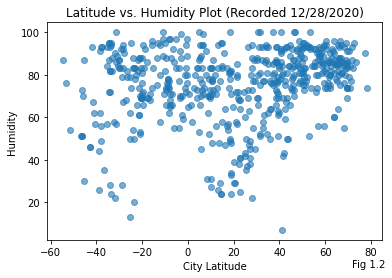

Comparison of a city's humidity against its
latitudinal location on the globe. Humidity seems to
be less varied at higher latitudes.


In [9]:
# Gather data
x_values = clean_city_data["City Latitude"]
y_values = clean_city_data["Humidity"]

# Draw plot and labels
plt.scatter(x_values, y_values, alpha=0.60)
plt.xlabel("City Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity Plot (Recorded 12/28/2020)")
plt.figtext(.83,.03,"Fig 1.2")
plt.show()

# Print analysis
print(f'Comparison of a city\'s humidity against its\n\
latitudinal location on the globe. Humidity seems to\n\
be less varied at higher latitudes.')

## Latitude vs. Cloudiness Plot

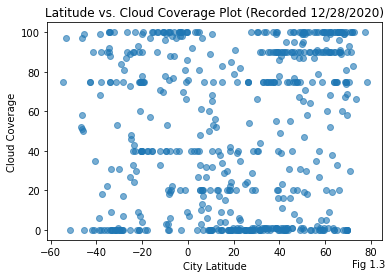

Comparison of a city's cloud coverage against its 
latitudinal location on the globe. No clear and relevant 
patterns present.


In [10]:
# Gather data
x_values = clean_city_data["City Latitude"]
y_values = clean_city_data["Cloud Coverage"]

# Draw plot and labels
plt.scatter(x_values, y_values, alpha=0.60)
plt.xlabel("City Latitude")
plt.ylabel("Cloud Coverage")
plt.title("Latitude vs. Cloud Coverage Plot (Recorded 12/28/2020)")
plt.figtext(.83,.03,"Fig 1.3")
plt.show()

# Print analysis
print(f'Comparison of a city\'s cloud coverage against its \n\
latitudinal location on the globe. No clear and relevant \n\
patterns present.')

## Latitude vs. Wind Speed Plot

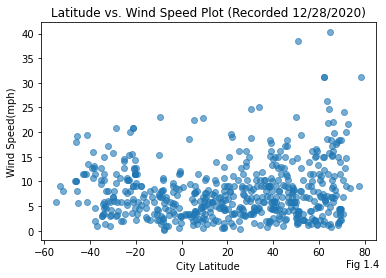

Comparison of a city's wind speed against its
latitudinal location on the globe. Common wind speed levels
range from around 0 to 10mph. The number of observations
begin to drop off above 10mph.


In [73]:
# Gather data
x_values = clean_city_data["City Latitude"]
y_values = clean_city_data["Wind Speed"]

# Draw plot and labels
plt.scatter(x_values, y_values, alpha=0.60)
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("Latitude vs. Wind Speed Plot (Recorded 12/28/2020)")
plt.figtext(.83,.03,"Fig 1.4")
plt.show()

# Print analysis
print(f'Comparison of a city\'s wind speed against its\n\
latitudinal location on the globe. Common wind speed levels\n\
range from around 0 to 10mph. The number of observations\n\
begin to drop off above 10mph.')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

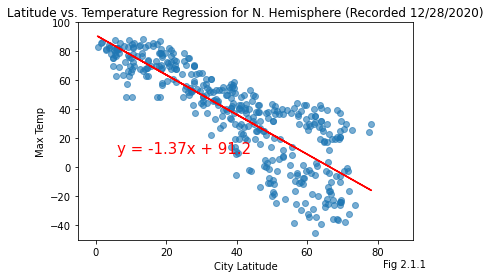

R-squared: 0.696


In [79]:
# Gather data
x_values = clean_city_data.loc[clean_city_data["City Latitude"] >= 0, "City Latitude"]
y_values = clean_city_data.loc[clean_city_data["City Latitude"] >= 0, "Max Temperature"]

# Draw plot and labels
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, alpha=0.60)
# Fix axes to both fit entire possible range of latitudes and match in scale with chart of opposite hemisphere
# for fair comparison
plt.xlim(-5,90)
plt.ylim(-50,100)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("City Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature Regression for N. Hemisphere (Recorded 12/28/2020)")
plt.figtext(.83,.03,"Fig 2.1.1")
plt.show()

# Print R^2
print(f'R-squared: {round(rvalue**2,3)}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

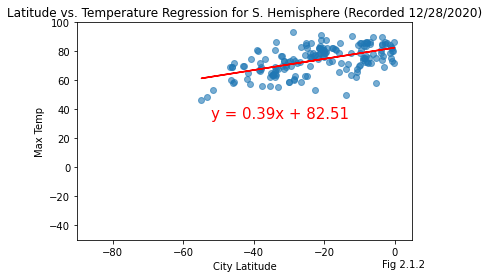

R-squared: 0.296

The northern hemisphere sees a moderate
correlation between global latitude and max temperature
in a city (R^2 = 0.696), while the southern hemisphere sees
a fair-weak correlation (R^2 = 0.296).


In [78]:
# Gather data
x_values = clean_city_data.loc[clean_city_data["City Latitude"] < 0, "City Latitude"]
y_values = clean_city_data.loc[clean_city_data["City Latitude"] < 0, "Max Temperature"]

# Draw plot and labels
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, alpha=0.60)
# Fix axes to both fit entire possible range of latitudes and match in scale with chart of opposite hemisphere
# for fair comparison
plt.xlim(-90,5)
plt.ylim(-50,100)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq, (-52,34), fontsize=15, color="red")
plt.xlabel("City Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature Regression for S. Hemisphere (Recorded 12/28/2020)")
plt.figtext(.83,.03,"Fig 2.1.2")
plt.show()

# Print R^2
print(f'R-squared: {round(rvalue**2, 3)}\n')

# Print analysis
print(f'The northern hemisphere sees a moderate\n\
correlation between global latitude and max temperature\n\
in a city (R^2 = 0.696), while the southern hemisphere sees\n\
a fair-weak correlation (R^2 = 0.296).')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

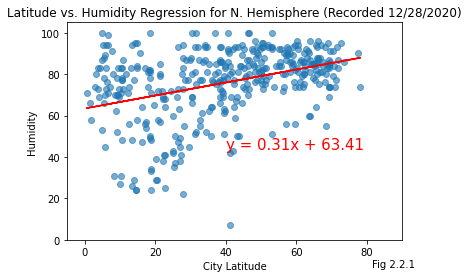

R-squared: 0.14


In [80]:
# Gather data
x_values = clean_city_data.loc[clean_city_data["City Latitude"] >= 0, "City Latitude"]
y_values = clean_city_data.loc[clean_city_data["City Latitude"] >= 0, "Humidity"]

# Draw plot and labels
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, alpha=0.60)
# Fix axes to both fit entire possible range of latitudes and match in scale with chart of opposite hemisphere
# for fair comparison
plt.xlim(-5,90)
plt.ylim(0,105)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(40,44),fontsize=15, color="red")
plt.xlabel("City Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity Regression for N. Hemisphere (Recorded 12/28/2020)")
plt.figtext(.83,.03,"Fig 2.2.1")
plt.show()

# Print R^2
print(f'R-squared: {round(rvalue**2, 3)}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

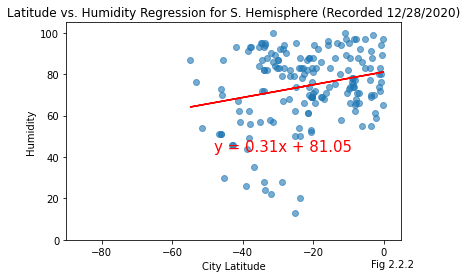

R-squared: 0.054

The northern and southern hemispheres see loose
correlation between global latitude and humidity
(at R^2 = 0.14 and 0.054 respectively). The
northern hemisphere sees concentration of higher 
humidities at higher latitudes.


In [81]:
# Gather data
x_values = clean_city_data.loc[clean_city_data["City Latitude"] < 0, "City Latitude"]
y_values = clean_city_data.loc[clean_city_data["City Latitude"] < 0, "Humidity"]

# Draw plot and labels
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, alpha=0.60)
# Fix axes to both fit entire possible range of latitudes and match in scale with chart of opposite hemisphere
# for fair comparison
plt.xlim(-90,5)
plt.ylim(0,105)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(-48, 43), fontsize=15, color="red")
plt.xlabel("City Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity Regression for S. Hemisphere (Recorded 12/28/2020)")
plt.figtext(.83,.03,"Fig 2.2.2")
plt.show()

# Print R^2
print(f'R-squared: {round(rvalue**2,3)}\n')

# Print analysis
print(f'The northern and southern hemispheres see loose\n\
correlation between global latitude and humidity\n\
(at R^2 = 0.14 and 0.054 respectively). The\n\
northern hemisphere sees concentration of higher \n\
humidities at higher latitudes.')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

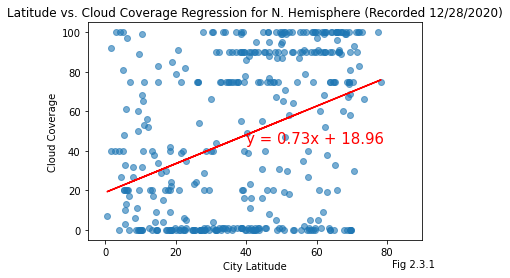

R-squared: 0.138


In [68]:
# Gather data
x_values = clean_city_data.loc[clean_city_data["City Latitude"] >= 0, "City Latitude"]
y_values = clean_city_data.loc[clean_city_data["City Latitude"] >= 0, "Cloud Coverage"]

# Draw plot and labels
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, alpha=0.60)
# Fix axes to both fit entire possible range of latitudes and match in scale with chart of opposite hemisphere
# for fair comparison
plt.xlim(-5,90)
plt.ylim(-5,105)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(40,44),fontsize=15, color="red")
plt.figtext(.83,.03,"Fig 2.3.1")
plt.xlabel("City Latitude")
plt.ylabel("Cloud Coverage")
plt.title("Latitude vs. Cloud Coverage Regression for N. Hemisphere (Recorded 12/28/2020)")
plt.show()

# Print R^2
print(f'R-squared: {round(rvalue**2, 3)}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

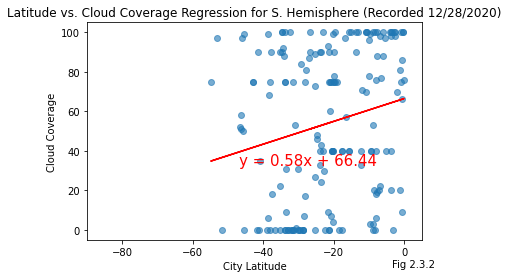

R-squared: 0.041

The northern and southern hemispheres see poor
correlation between global latitude and humidity
(at R^2 = 0.138 and 0.041 respectively). The slope
of the regressions imply a possible increaase in
cloud coverage with increase in latitude.


In [74]:
# Gather data
x_values = clean_city_data.loc[clean_city_data["City Latitude"] < 0, "City Latitude"]
y_values = clean_city_data.loc[clean_city_data["City Latitude"] < 0, "Cloud Coverage"]

# Draw plot and labels
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, alpha=0.60)
# Fix axes to both fit entire possible range of latitudes and match in scale with chart of opposite hemisphere
# for fair comparison
plt.xlim(-90,5)
plt.ylim(-5,105)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq, (-47, 33), fontsize=15, color="red")
plt.figtext(.83,.03,"Fig 2.3.2")
plt.xlabel("City Latitude")
plt.ylabel("Cloud Coverage")
plt.title("Latitude vs. Cloud Coverage Regression for S. Hemisphere (Recorded 12/28/2020)")
plt.show()

# Print R^2
print(f'R-squared: {round(rvalue**2,3)}\n')

# Print analysis
print(f'The northern and southern hemispheres see poor\n\
correlation between global latitude and humidity\n\
(at R^2 = 0.138 and 0.041 respectively). The slope\n\
of the regressions imply a possible increaase in\n\
cloud coverage with increase in latitude.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

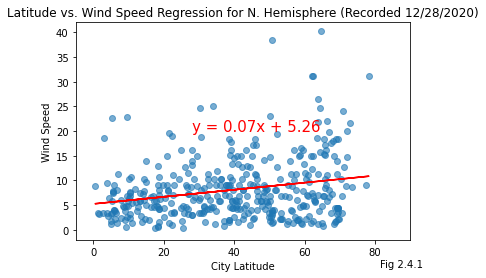

R-squared: 0.057


In [65]:
# Gather data
x_values = clean_city_data.loc[clean_city_data["City Latitude"] >= 0, "City Latitude"]
y_values = clean_city_data.loc[clean_city_data["City Latitude"] >= 0, "Wind Speed"]

# Draw plot and labels
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values,y_values, alpha=0.60)
# Fix axes to both fit entire possible range of latitudes and match in scale with chart of opposite hemisphere
# for fair comparison
plt.xlim(-5,90)
plt.ylim(-2,42)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (28, 20), fontsize=15, color="red")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed Regression for N. Hemisphere (Recorded 12/28/2020)")
plt.figtext(.83,.03,"Fig 2.4.1")
plt.show()

# Print R^2
print(f'R-squared: {round(rvalue**2, 3)}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

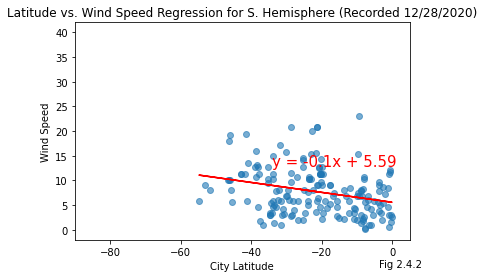

R-squared: 0.079

The northern and southern hemispheres see poor
correlation between global latitude and wind speed
(at R^2 = 0.057 and 0.079 respectively). The slopes
of the regression lines between the two hemispheres 
are opposite signs of each other, implying wind speeds
may be lower around the equator.


In [75]:
# Gather data
x_values = clean_city_data.loc[clean_city_data["City Latitude"] < 0, "City Latitude"]
y_values = clean_city_data.loc[clean_city_data["City Latitude"] < 0, "Wind Speed"]

# Draw plot and labels
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, alpha=0.60)
# Fix axes to both fit entire possible range of latitudes and match in scale with chart of opposite hemisphere
# for fair comparison
plt.xlim(-90,5)
plt.ylim(-2,42)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-34, 13), fontsize=15, color="red")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed Regression for S. Hemisphere (Recorded 12/28/2020)")
plt.figtext(.83,.03,"Fig 2.4.2")
plt.show()

# Print R^2
print(f'R-squared: {round(rvalue**2, 3)}\n')

# Print analysis
print(f'The northern and southern hemispheres see poor\n\
correlation between global latitude and wind speed\n\
(at R^2 = 0.057 and 0.079 respectively). The slopes\n\
of the regression lines between the two hemispheres \n\
are opposite signs of each other, implying wind speeds\n\
may be lower around the equator.')